In [320]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.svm import SVC

import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

import colorama
from colorama import Fore, Back, Style

#ignoring warnings to keep the output clean
import warnings
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, precision_score, recall_score
warnings.filterwarnings('ignore')

In [321]:
print("Tran Tien Toan")

Tran Tien Toan


In [322]:
loan_data = pd.read_csv('/Users/trantientoan/Desktop/Loan Final/archive (5)/loan_sanction_train.csv')
test_data = pd.read_csv('/Users/trantientoan/Desktop/Loan Final/archive (5)/loan_sanction_test.csv')
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [323]:
print(Style.BRIGHT+'Train Data:'+ Style.RESET_ALL)
print(Style.BRIGHT+'-----------'+ Style.RESET_ALL)
loan_data.head().style.set_properties(**{'background-color': '#ffffff' ,'border': '1.3px solid black','color':'black','border-color': '#000000'})

Train Data:
-----------


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.000000,nan,360.000000,1.000000,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.000000,128.000000,360.000000,1.000000,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.000000,66.000000,360.000000,1.000000,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.000000,120.000000,360.000000,1.000000,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.000000,141.000000,360.000000,1.000000,Urban,Y


In [324]:
print(Style.BRIGHT+'Test Data:'+ Style.RESET_ALL)
print(Style.BRIGHT+'----------'+ Style.RESET_ALL)
test_data.head().style.set_properties(**{'background-color': '#ffffff' ,'border': '1.3px solid black','color':'black','border-color': '#000000'})

Test Data:
----------


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.000000,360.000000,1.000000,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.000000,360.000000,1.000000,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.000000,360.000000,1.000000,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.000000,360.000000,nan,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.000000,360.000000,1.000000,Urban


In [325]:
loan_data = loan_data.drop('Loan_ID',axis = 1)
#Colors used in the Notebook
colorsy =['#ee4035','#f37736', '#fdf498', '#7bc043', '#0392cf', '#008744', '#0057e7', '#d62d20', '#ffa700']
tricolor=['#7bc043','#0392cf', '#f37736']
doucolor=['#008744','#0057e7']
twocolor=['#7bc043','#f37736']

In [326]:
print(Style.BRIGHT+ 'Checking Null Values:' + Style.RESET_ALL)
print(Style.BRIGHT+ '---------------------' + Style.RESET_ALL)
print(loan_data.isnull().sum())

Checking Null Values:
---------------------
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64


In [327]:
print(Style.BRIGHT+ 'All the Null values are dropped from the Dataset' + Style.RESET_ALL)
print('\n')
print(Style.BRIGHT+ 'Verifying Null Values:' + Style.RESET_ALL)
print(Style.BRIGHT+ '---------------------' + Style.RESET_ALL)
loan_data.dropna(inplace=True)
loan_data.isnull().sum()

All the Null values are dropped from the Dataset


Verifying Null Values:
---------------------


Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

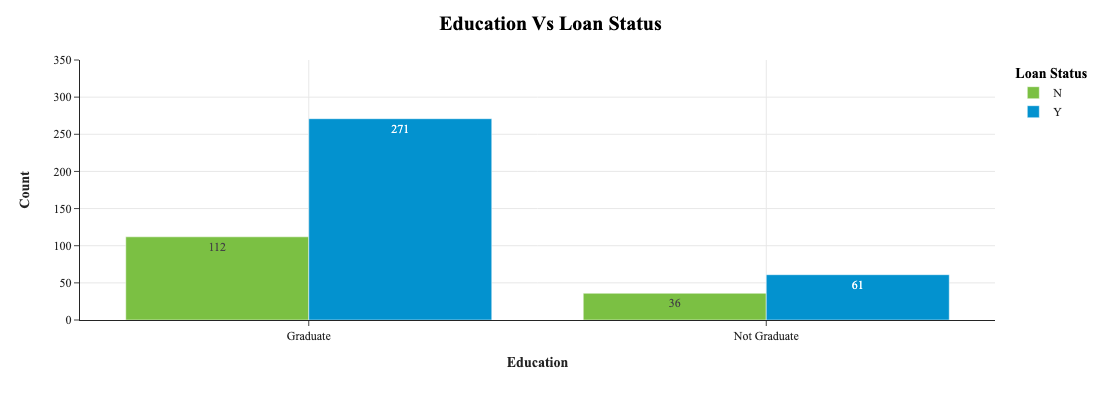

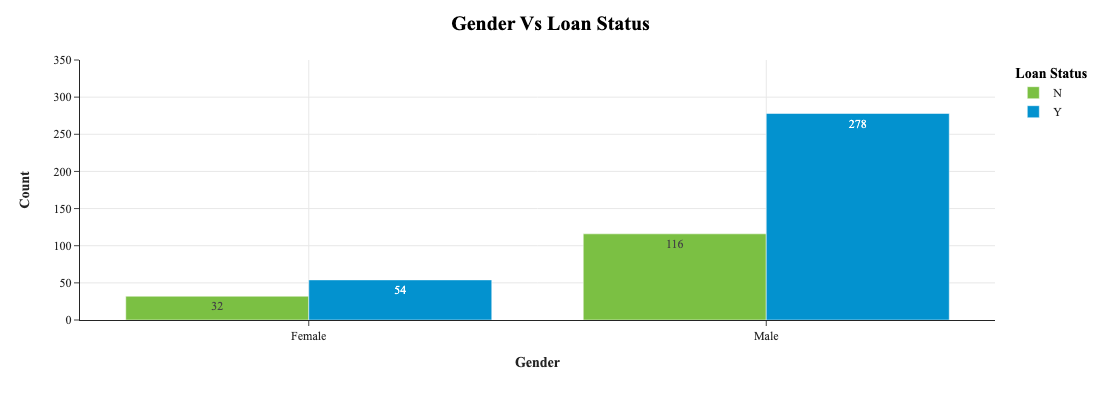

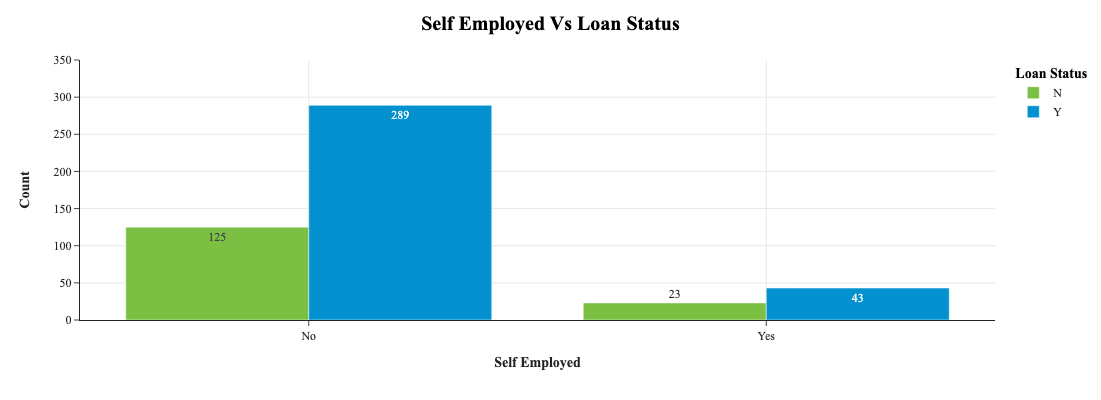

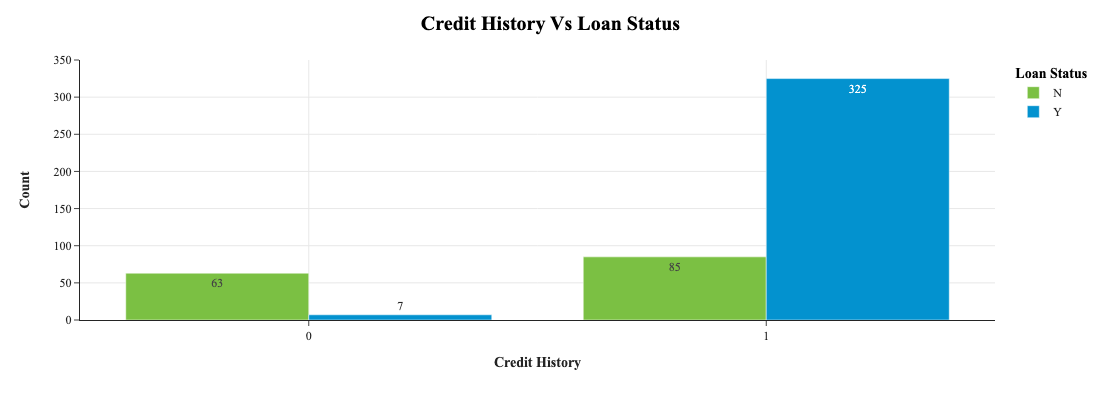

In [328]:
Education_loan_data=loan_data[['Education', 'Loan_Status']].groupby(['Education', 'Loan_Status']).agg(Count = ('Loan_Status','count')).reset_index()
Gender_loan_data=loan_data[['Gender', 'Loan_Status']].groupby(['Gender', 'Loan_Status']).agg(Count = ('Loan_Status','count')).reset_index()
Self_Employed_loan_data=loan_data[['Self_Employed', 'Loan_Status']].groupby(['Self_Employed', 'Loan_Status']).agg(Count = ('Loan_Status','count')).reset_index()
Credit_History_loan_data=loan_data[['Credit_History', 'Loan_Status']].groupby(['Credit_History', 'Loan_Status']).agg(Count = ('Loan_Status','count')).reset_index()


for col in ['Education','Gender','Self_Employed','Credit_History']:
  print('\n\n')
  df=col+'_loan_data'
  df = pd.DataFrame(eval(df))
  col_label = col.replace("_", " " )
  fig1=px.bar(data_frame=df, x=col, y='Count', color='Loan_Status', barmode='group', color_discrete_sequence=tricolor, text_auto=True, template='simple_white')

  fig1.update_layout(yaxis_range=[0,350])  
  fig1.update_yaxes(showgrid=True)
  fig1.update_xaxes(showgrid=True)   
    
  fig1.update_layout(height=400,width=800,
      title=f'<b>{col_label} Vs Loan Status</b>',
      font_family="Times New Roman",
      title_font_family="Times New Roman",
      title_font_color="#000000",
      title_font_size=20,
      title_xanchor="center",
      title_x=0.5,
      xaxis_title=f"<b>{col_label}</b>",
      yaxis_title="<b>Count</b>",
      legend_title='<b>Loan Status</b>',
      legend_title_font_color="#000000",
      plot_bgcolor ='#ffffff'
  )

  fig1.show()

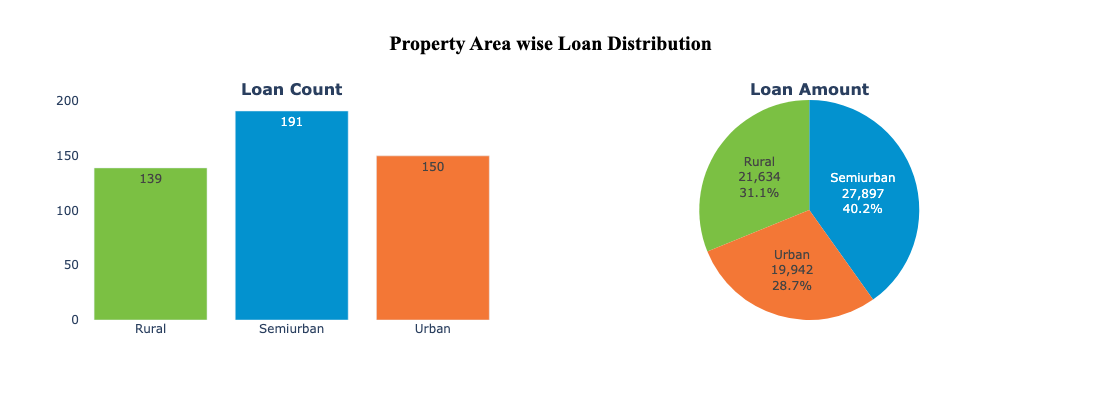

In [329]:
pa_loan_df = loan_data[['Property_Area', 'LoanAmount']].groupby(['Property_Area']).agg({'Property_Area':'count', 'LoanAmount':'sum'})
pa_loan_df.columns = [ 'Loan_Count', 'Loan_Amount']
pa_loan_df.reset_index(inplace=True)

fig = make_subplots(rows=1,cols=2,specs=[[{'type':'xy'},{'type':'Domain'}]],
                    vertical_spacing = 0.25, horizontal_spacing=.1,
                    subplot_titles=['<b>Loan Count</b>', '<b>Loan Amount</b>'])



fig.add_trace(go.Bar(x=pa_loan_df['Property_Area'],y=pa_loan_df['Loan_Count'], text=pa_loan_df['Loan_Count'], 
                     marker_color=tricolor ),row=1,col=1)
fig.add_trace(go.Pie(labels=pa_loan_df['Property_Area'], values=pa_loan_df['Loan_Amount'],name='Loan_Amount', 
                     textinfo='percent+label+value', marker_colors=tricolor),row=1,col=2)

fig.update_layout(height=400,width=1000, 
                  title_text="<b>Property Area wise Loan Distribution</b>",
                  title_xanchor="center",
                  title_x=0.5,
                  title_font_family="Times New Roman",title_font_color="black",
                  title_font_size=20,
                  showlegend=False,
                  legend_bgcolor='#ffffff',
                  paper_bgcolor='#ffffff',
                  plot_bgcolor = '#ffffff')
fig.show()

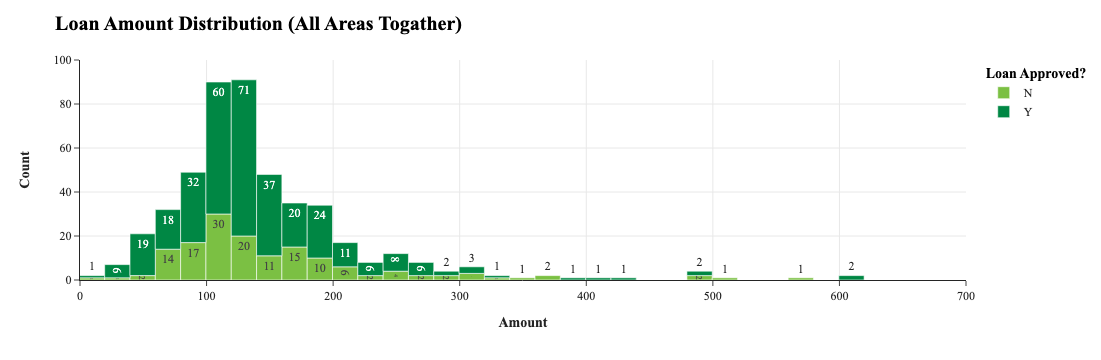

In [330]:
fig=px.histogram(loan_data.sort_values('Loan_Status', ascending=True), x='LoanAmount' , 
                 color='Loan_Status', nbins=50, text_auto=True, template='simple_white', 
                 color_discrete_sequence=['#7bc043','#008744'])

fig.update_yaxes(showgrid=True)
fig.update_xaxes(showgrid=True) 

fig.update_layout(bargap=0)
fig.update_layout(yaxis_range=[0,100])
fig.update_layout(xaxis_range=[0,700])

fig.update_layout(
    title='<b>Loan Amount Distribution (All Areas Togather)</b>',
    font_family="Times New Roman",
    title_font_family="Times New Roman",
    title_font_color="#000000",
    title_font_size=20,
    xaxis_title="<b>Amount</b>",
    yaxis_title="<b>Count</b>",
    legend_title='<b>Loan Approved?</b>',
    legend_title_font_color='#000000',
    plot_bgcolor = '#ffffff'
)


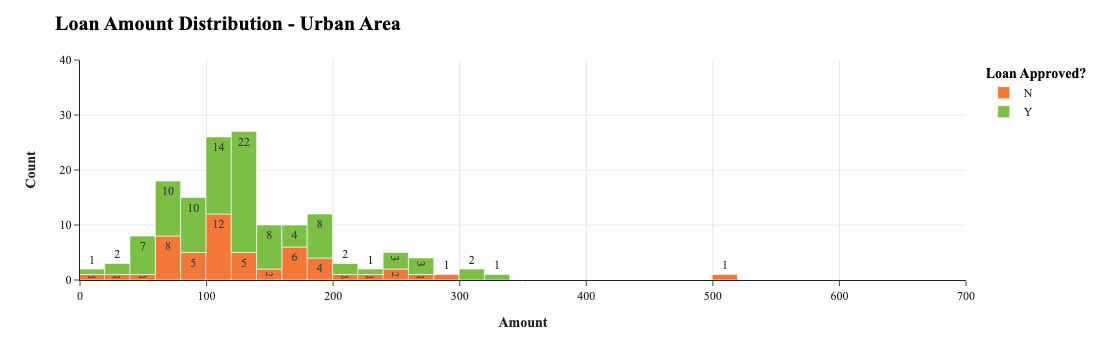

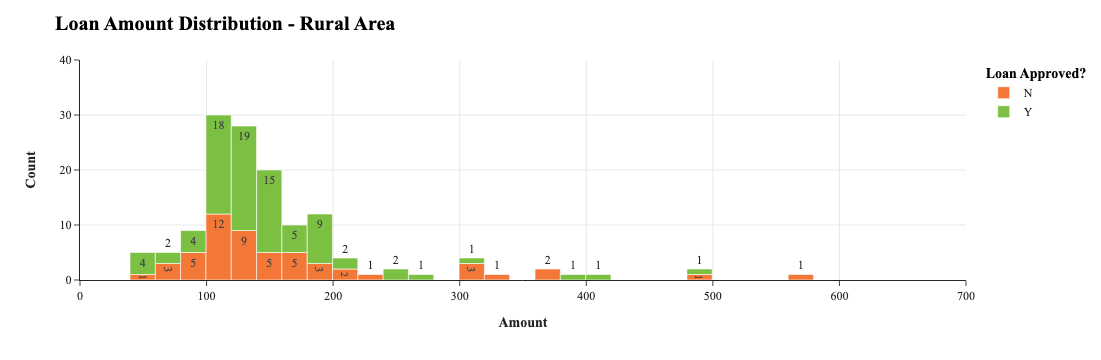

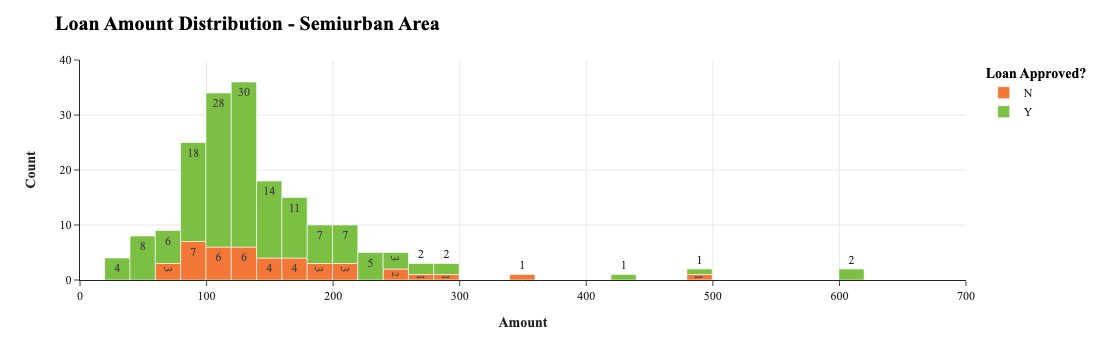

In [331]:
for area in ['Urban','Rural','Semiurban'] :
  bins=50
  if area == 'Urban':
    bins=40

  print('\n\n')
  fig=px.histogram(loan_data[loan_data['Property_Area']==area].sort_values('Loan_Status', ascending=True),
                   x='LoanAmount' , color='Loan_Status', nbins=bins, text_auto=True, 
                   template='simple_white', color_discrete_map ={'Y':'#7bc043', 'N':'#f37736'}) 
  fig.update_layout(bargap=0)
  fig.update_layout(yaxis_range=[0,40])
  fig.update_layout(xaxis_range=[0,700])


  fig.update_yaxes(showgrid=True)
  fig.update_xaxes(showgrid=True) 

  fig.update_layout(
      title=f'<b>Loan Amount Distribution - {area} Area</b>',
      font_family="Times New Roman",
      title_font_family="Times New Roman",
      title_font_color="#000000",
      title_font_size=20,
      xaxis_title="<b>Amount</b>",
      yaxis_title="<b>Count</b>",
      legend_title='<b>Loan Approved?</b>',
      legend_title_font_color='#000000',
      plot_bgcolor = '#ffffff'
  )
  fig.show()

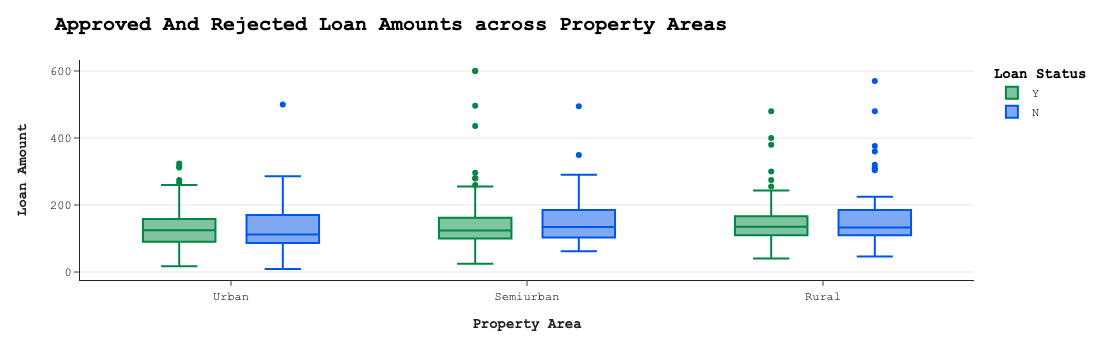

In [332]:
fig=px.box(data_frame=loan_data, 
              x='Property_Area',y='LoanAmount',template='simple_white',
              color = 'Loan_Status',
              category_orders={"Loan_Status"  : ['Y','N'],
                                "Property_Area" : ['Urban', 'Semiurban', 'Rural']},
              color_discrete_sequence=doucolor)
fig.update_yaxes(showgrid=True)

fig.update_layout(
    title='<b>Approved And Rejected Loan Amounts across Property Areas</b>',
    font_family="Courier New",
    title_font_family="Courier New",
    title_font_color="#000000",
    title_font_size=20,
    xaxis_title="<b>Property Area</b>",
    yaxis_title="<b>Loan Amount</b>",
    legend_title='<b>Loan Status</b>',
    legend_title_font_color="#000000",
    plot_bgcolor = '#ffffff'
)

fig.show()

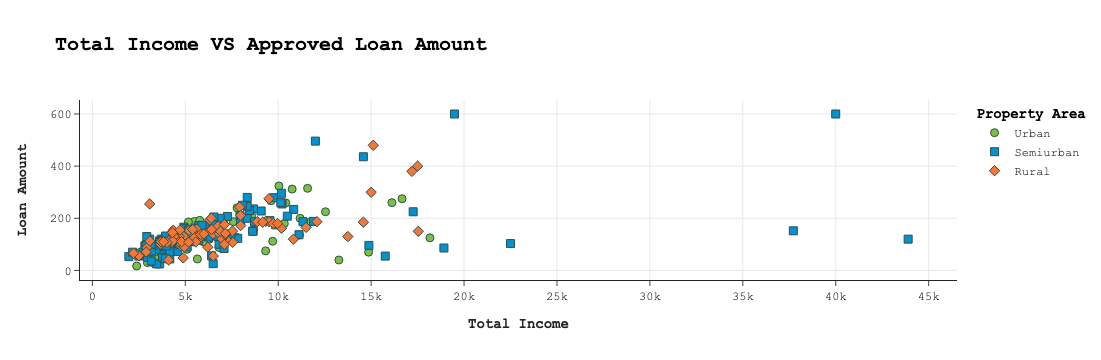

In [333]:
loan_data['Total_Income'] = loan_data['ApplicantIncome'] + loan_data['CoapplicantIncome']
loan_data = loan_data.drop(['ApplicantIncome','CoapplicantIncome'], axis=1)

fig = px.scatter(loan_data[loan_data['Loan_Status']=='Y'], x="Total_Income", y="LoanAmount",  
                color="Property_Area",  template='simple_white',
                symbol = 'Property_Area', symbol_sequence=['circle', 'square', 'diamond', 'triangle-up'],
                color_discrete_sequence=tricolor, 
                hover_name="Loan_Status",title='<b>Total Income VS Approved Loan Amount</b>')
fig.update_yaxes(showgrid=True)
fig.update_xaxes(showgrid=True)
fig.update_traces(marker=dict(size=8,
                              line=dict(width=1,
                                        color='DarkSlateGrey')),
                  selector=dict(mode='markers'))
fig.update_layout(
    font_family="Courier New",
    title_font_family="Courier New",
    title_font_color="#000000",
    title_font_size=20,
    xaxis_title="<b>Total Income</b>",
    yaxis_title="<b>Loan Amount</b>",
    legend_title='<b>Property Area</b>',
    legend_title_font_color="#000000",
    plot_bgcolor = '#ffffff'
)
fig.show()

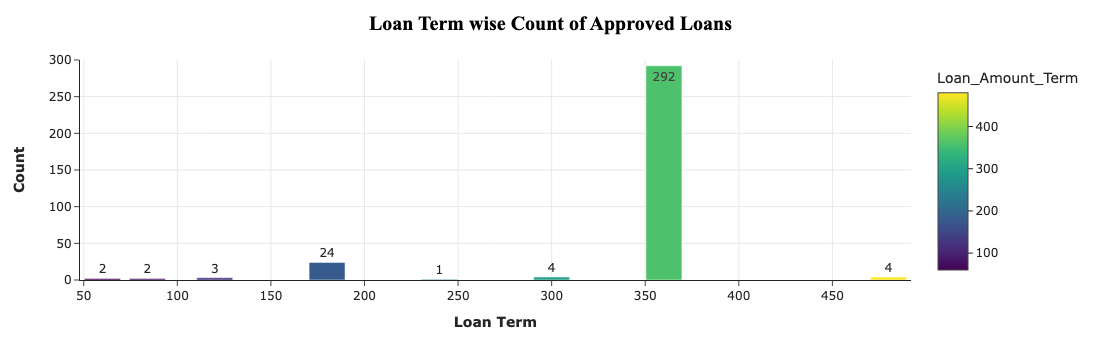

In [334]:
loan_data['Loan_Amount_Term'] = loan_data['Loan_Amount_Term'].astype(int)
loan_data2 = loan_data[loan_data['Loan_Status']=='Y'][['Loan_Amount_Term']].groupby('Loan_Amount_Term')\
.agg(Count=('Loan_Amount_Term', 'count')).reset_index()
loan_data2['Loan_Amount_Term'] = loan_data2['Loan_Amount_Term'].astype(int)

fig=px.bar(data_frame=loan_data2, x='Loan_Amount_Term', y='Count', template='simple_white', 
           color = 'Loan_Amount_Term', color_discrete_sequence=colorsy, text_auto='True')

fig.update_yaxes(showgrid=True)
fig.update_xaxes(showgrid=True)
fig.update_layout(yaxis_range=[0,300])

fig.update_layout(title_text="<b>Loan Term wise Count of Approved Loans</b>",
                  title_font_family="Times New Roman",title_font_color="#000000",
                  title_xanchor="center",
                  title_x=0.5,
                  title_font_size=20,
                  xaxis_title="<b>Loan Term</b>",
                  yaxis_title="<b>Count</b>",
                  legend_title='<b>City Tier</b>',
                  legend_title_font_color="#000000",
                  showlegend=True,
                  plot_bgcolor ='#ffffff')
fig.show()

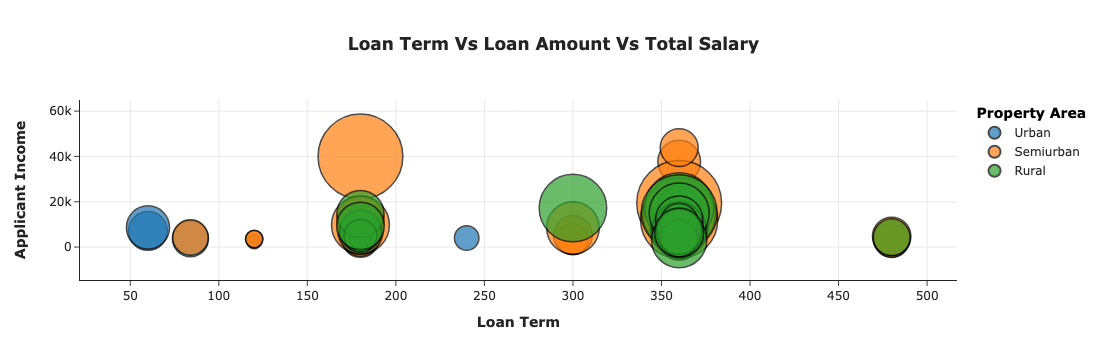

In [335]:
loan_data3=loan_data[loan_data['Loan_Status']=='Y'].sort_values('Loan_Amount_Term')

fig = px.scatter(loan_data3, x="Loan_Amount_Term", y="Total_Income", size="LoanAmount", color="Property_Area", 
                 template='simple_white',hover_name="LoanAmount",  size_max=60,
                 title='<b> Loan Term Vs Loan Amount Vs Total Salary</b>')
fig.update_yaxes(showgrid=True)
fig.update_xaxes(showgrid=True)
fig.update_layout(title_x=0.5)
fig.update_traces(marker=dict(line=dict(color='#000000', width=1.5)))

fig.update_layout(xaxis_title="<b>Loan Term</b>",
                  yaxis_title="<b>Applicant Income</b>",
                  legend_title='<b>Property Area</b>',
                  legend_title_font_color="#000000",
                  showlegend=True,
                  plot_bgcolor ='#ffffff')


fig.show()

In [336]:
ml_loan_data = loan_data.copy()

print(Style.BRIGHT+'Data for Model Building:'+ Style.RESET_ALL)
print(Style.BRIGHT+'------------------------'+ Style.RESET_ALL)
ml_loan_data.head().style.set_properties(**{'background-color': '#ffffff' ,'border': '1.3px solid black','color':'black','border-color': '#000000'})

Data for Model Building:
------------------------


,Gender,Married,Dependents,Education,Self_Employed,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income
1,Male,Yes,1,Graduate,No,128.000000,360,1.000000,Rural,N,6091.000000
2,Male,Yes,0,Graduate,Yes,66.000000,360,1.000000,Urban,Y,3000.000000
3,Male,Yes,0,Not Graduate,No,120.000000,360,1.000000,Urban,Y,4941.000000
4,Male,No,0,Graduate,No,141.000000,360,1.000000,Urban,Y,6000.000000
5,Male,Yes,2,Graduate,Yes,267.000000,360,1.000000,Urban,Y,9613.000000


In [337]:
GN_dummies = pd.get_dummies(ml_loan_data['Gender'],prefix="Gender",drop_first=True)
ml_loan_data = ml_loan_data.drop('Gender',axis = 1)
ml_loan_data = ml_loan_data.join(GN_dummies)
ml_loan_data['Married'] = ml_loan_data['Married'].map({'Yes':1, 'No':2})
ml_loan_data['Self_Employed'] = ml_loan_data['Self_Employed'].map({'Yes':1, 'No':2})
ml_loan_data['Education'] = ml_loan_data['Education'].map({'Graduate':1, 'Not Graduate':2})
ml_loan_data['Loan_Status'] = ml_loan_data['Loan_Status'].map({'Y':1, 'N':2})
ml_loan_data['Dependents'] = ml_loan_data['Dependents'].map({'0': 0, '1':1, '2':2, '3+':3})
PA_dummies = pd.get_dummies(ml_loan_data['Property_Area'],prefix="PA",drop_first=True)
ml_loan_data = ml_loan_data.drop('Property_Area',axis = 1)
ml_loan_data = ml_loan_data.join(PA_dummies)
ml_loan_data.head(10)
#print(PA_dummies)

,Married,Dependents,Education,Self_Employed,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Total_Income,Gender_Male,PA_Semiurban,PA_Urban
1,1,1,1,2,128.0,360,1.0,2,6091.0,True,False,False
2,1,0,1,1,66.0,360,1.0,1,3000.0,True,False,True
3,1,0,2,2,120.0,360,1.0,1,4941.0,True,False,True
4,2,0,1,2,141.0,360,1.0,1,6000.0,True,False,True
5,1,2,1,1,267.0,360,1.0,1,9613.0,True,False,True
6,1,0,2,2,95.0,360,1.0,1,3849.0,True,False,True
7,1,3,1,2,158.0,360,0.0,2,5540.0,True,True,False
8,1,2,1,2,168.0,360,1.0,1,5532.0,True,False,True
9,1,1,1,2,349.0,360,1.0,2,23809.0,True,True,False
10,1,2,1,2,70.0,360,1.0,1,3900.0,True,False,True


<Axes: title={'center': 'Correlation'}>

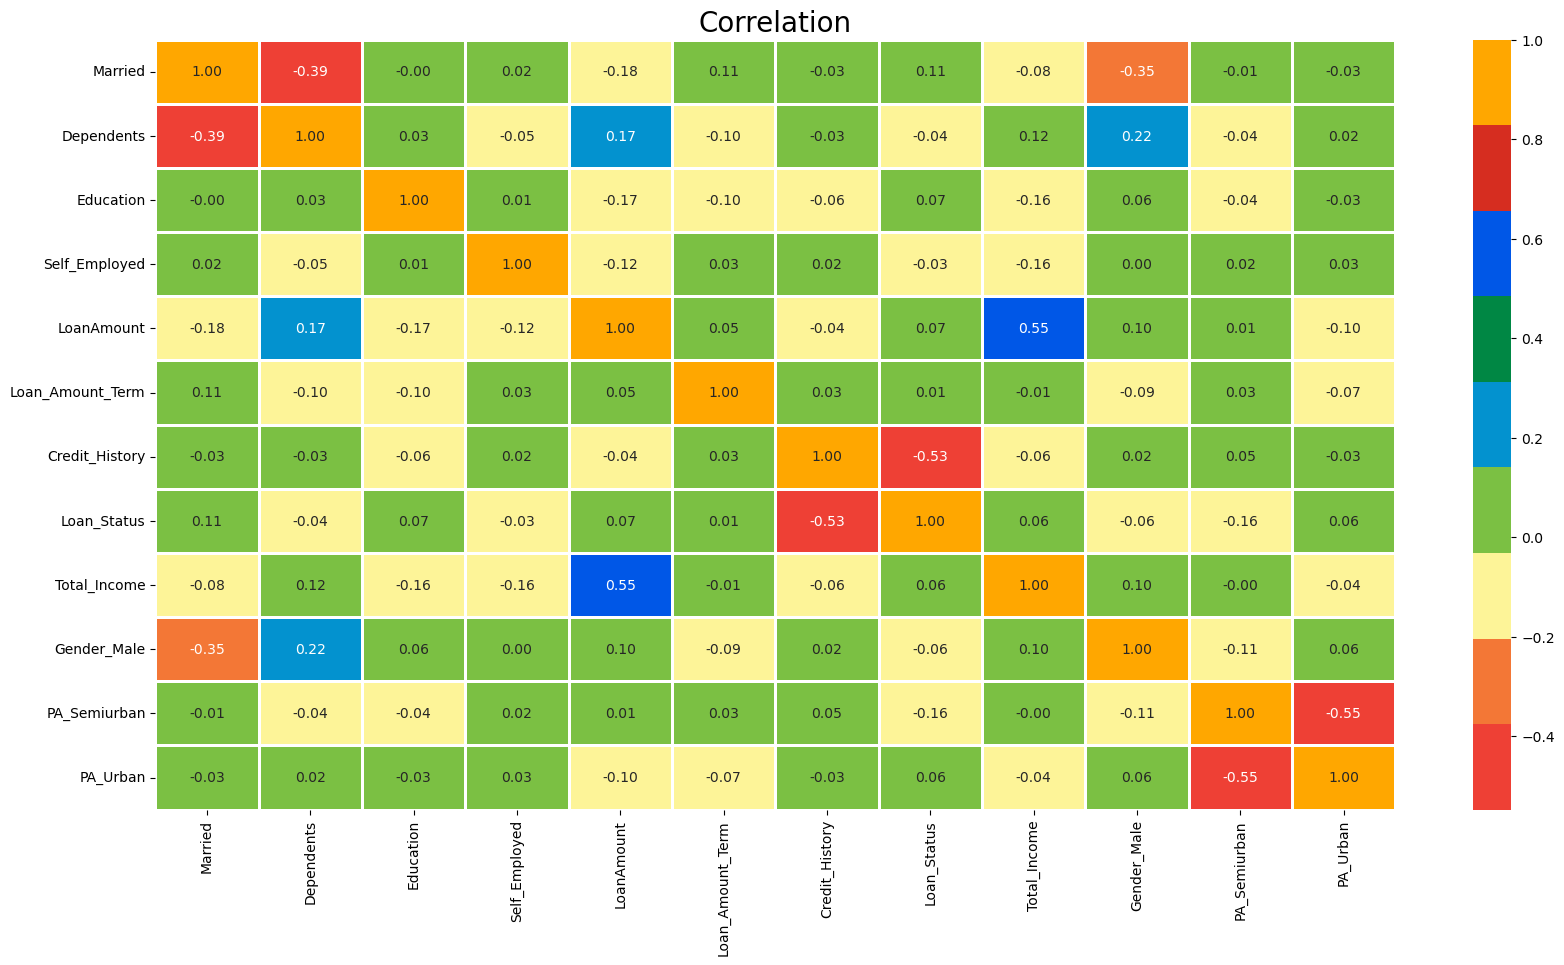

In [338]:
plt.figure(figsize=(20, 10))
plt.title('Correlation', fontsize =20)
sns.heatmap(ml_loan_data.corr(),
            cmap = colorsy,
            fmt = '.2f',
            linewidths = 2,
            annot = True)

In [385]:
X = ml_loan_data.drop('Loan_Status',axis = 1)
y = ml_loan_data['Loan_Status']

In [386]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

In [387]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix,accuracy_score,f1_score

In [388]:
#rfc = RandomForestClassifier(n_estimators=500, random_state=300)
#rfc = RandomForestClassifier(n_estimators=100,max_depth=3,min_samples_leaf = 10)

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Tạo mô hình

rfc = RandomForestClassifier(n_estimators=250, random_state=250)
rfc.fit(X_train,y_train)

RandomForestClassifier(n_estimators=250, random_state=250)

In [389]:
y_pred = rfc.predict(X_test)

In [390]:
confusion_matrix(y_pred,y_test)

array([[63, 13],
       [ 4, 16]])

In [391]:
# Tính và in ra Accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Tính và in ra F1 Score
f1 = f1_score(y_test, y_pred, average='binary')  # Sử dụng 'binary' cho bài toán phân loại nhị phân
# Nếu là phân loại đa lớp, bạn có thể cần chỉ định `average` là 'micro', 'macro', hoặc 'weighted' tùy thuộc vào ngữ cảnh:
# f1 = f1_score(y_test, y_pred, average='macro')
print("F1 Score:", f1)
# Tính Precision
precision = precision_score(y_test, y_pred)
print("Precision:", precision)

# Tính Recall
recall = recall_score(y_test, y_pred)
print("Recall:", recall)

Accuracy: 0.8229166666666666
F1 Score: 0.8811188811188811
Precision: 0.8289473684210527
Recall: 0.9402985074626866


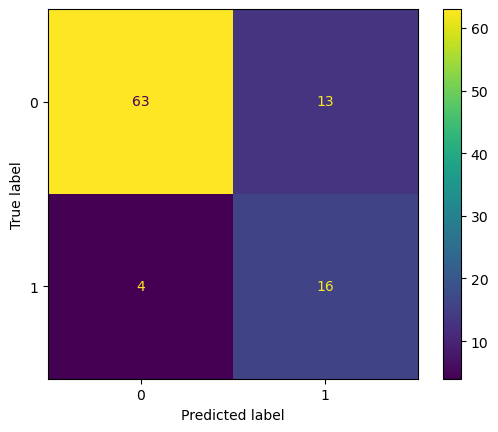

In [392]:
ConfusionMatrixDisplay(confusion_matrix(y_pred,y_test)).plot()

In [347]:
X = ml_loan_data.drop('Loan_Status',axis = 1)
y = ml_loan_data['Loan_Status']

In [348]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

In [349]:
from sklearn.model_selection import GridSearchCV

# Tạo một mô hình RandomForestClassifier
rf = RandomForestClassifier()

# Thiết lập lưới siêu tham số cho Grid Search
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'max_features': ['sqrt', 'log2']
}

# Tạo đối tượng GridSearchCV
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='accuracy')

# Huấn luyện mô hình với Grid Search
grid_search.fit(X_train, y_train)

# In ra các siêu tham số tốt nhất và điểm số
print("Best parameters:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)

Best parameters: {'max_depth': 20, 'max_features': 'sqrt', 'min_samples_split': 10, 'n_estimators': 300}
Best score: 0.8359193438140806


In [350]:
print("Best parameters:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)

# Tính và in ra F1 Score
f1 = f1_score(y_test, y_pred, average='binary')  # Sử dụng 'binary' cho bài toán phân loại nhị phân
# Nếu là phân loại đa lớp, bạn có thể cần chỉ định `average` là 'micro', 'macro', hoặc 'weighted' tùy thuộc vào ngữ cảnh:
# f1 = f1_score(y_test, y_pred, average='macro')
print("F1 Score:", f1)
# Tính Precision
precision = precision_score(y_test, y_pred)
print("Precision:", precision)

# Tính Recall
recall = recall_score(y_test, y_pred)
print("Recall:", recall)

Best parameters: {'max_depth': 20, 'max_features': 'sqrt', 'min_samples_split': 10, 'n_estimators': 300}
Best score: 0.8359193438140806
F1 Score: 0.7338129496402878
Precision: 0.68
Recall: 0.796875


In [351]:
confusion_matrix(y_pred,y_test)

array([[51, 24],
       [13,  8]])

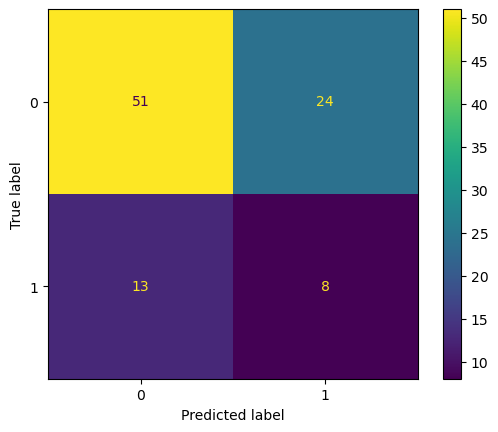

In [352]:
ConfusionMatrixDisplay(confusion_matrix(y_pred,y_test)).plot()

In [353]:
X = ml_loan_data.drop('Loan_Status',axis = 1)
y = ml_loan_data['Loan_Status']

In [354]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

In [355]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint as sp_randint

# Tạo một mô hình RandomForestClassifier
rf = RandomForestClassifier()

# Thiết lập phạm vi siêu tham số cho Random Search
param_dist = {
    'n_estimators': sp_randint(100, 400),
    'max_depth': sp_randint(10, 50),
    'min_samples_split': sp_randint(2, 20),
    'max_features': ['sqrt', 'log2']
}

# Tạo đối tượng RandomizedSearchCV
random_search = RandomizedSearchCV(estimator=rf, param_distributions=param_dist, n_iter=100, cv=5, scoring='accuracy', random_state=42)

# Huấn luyện mô hình với Random Search
random_search.fit(X_train, y_train)

# In ra các siêu tham số tốt nhất và điểm số
print("Best parameters:", random_search.best_params_)
print("Best score:", random_search.best_score_)

Best parameters: {'max_depth': 44, 'max_features': 'log2', 'min_samples_split': 18, 'n_estimators': 149}
Best score: 0.8176691729323308


In [356]:
print("Best parameters:", random_search.best_params_)
print("Best score:", random_search.best_score_)

# Tính và in ra F1 Score
f1 = f1_score(y_test, y_pred, average='binary')  # Sử dụng 'binary' cho bài toán phân loại nhị phân
# Nếu là phân loại đa lớp, bạn có thể cần chỉ định `average` là 'micro', 'macro', hoặc 'weighted' tùy thuộc vào ngữ cảnh:
# f1 = f1_score(y_test, y_pred, average='macro')
print("F1 Score:", f1)
# Tính Precision
precision = precision_score(y_test, y_pred)
print("Precision:", precision)

# Tính Recall
recall = recall_score(y_test, y_pred)
print("Recall:", recall)

Best parameters: {'max_depth': 44, 'max_features': 'log2', 'min_samples_split': 18, 'n_estimators': 149}
Best score: 0.8176691729323308
F1 Score: 0.7534246575342466
Precision: 0.7333333333333333
Recall: 0.7746478873239436


In [357]:
confusion_matrix(y_pred,y_test)

array([[55, 20],
       [16,  5]])

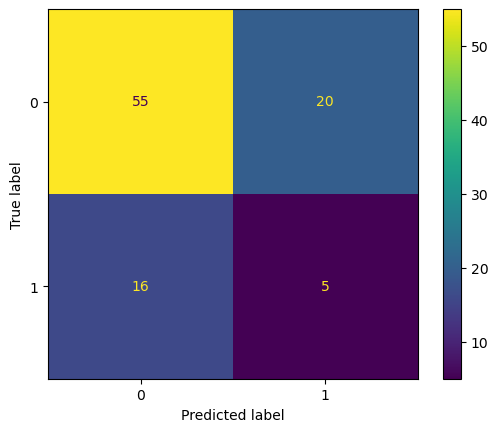

In [358]:
ConfusionMatrixDisplay(confusion_matrix(y_pred,y_test)).plot()

In [359]:
X = ml_loan_data.drop('Loan_Status',axis = 1)
y = ml_loan_data['Loan_Status']

In [360]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

In [361]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
ada_clf = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=1), n_estimators=200,
    algorithm="SAMME.R", learning_rate=0.5, random_state=42)
ada_clf.fit(X_train, y_train)

AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=1),
                   learning_rate=0.5, n_estimators=200, random_state=42)

In [362]:
y_pred = rfc.predict(X_test)

In [363]:
accuracy_score(y_pred,y_test)

0.96875

In [364]:
confusion_matrix(y_pred,y_test)

array([[61,  2],
       [ 1, 32]])

In [365]:
# Tính và in ra Accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Tính và in ra F1 Score
f1 = f1_score(y_test, y_pred, average='binary')  # Sử dụng 'binary' cho bài toán phân loại nhị phân
# Nếu là phân loại đa lớp, bạn có thể cần chỉ định `average` là 'micro', 'macro', hoặc 'weighted' tùy thuộc vào ngữ cảnh:
# f1 = f1_score(y_test, y_pred, average='macro')
print("F1 Score:", f1)
# Tính Precision
precision = precision_score(y_test, y_pred)
print("Precision:", precision)

# Tính Recall
recall = recall_score(y_test, y_pred)
print("Recall:", recall)

Accuracy: 0.96875
F1 Score: 0.976
Precision: 0.9682539682539683
Recall: 0.9838709677419355


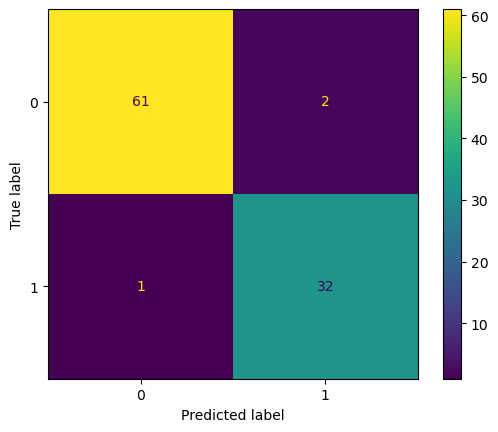

In [366]:
ConfusionMatrixDisplay(confusion_matrix(y_pred,y_test)).plot()

In [367]:
X = ml_loan_data.drop('Loan_Status',axis = 1)
y = ml_loan_data['Loan_Status']

In [368]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

In [369]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
gb_clf = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

# Huấn luyện mô hình
gb_clf.fit(X_train, y_train)

# Dự đoán kết quả trên tập kiểm thử
y_pred = gb_clf.predict(X_test)

# Đánh giá mô hình
accuracy = accuracy_score(y_test, y_pred)

In [370]:
accuracy

0.8229166666666666

In [371]:
# Tính và in ra Accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Tính và in ra F1 Score
f1 = f1_score(y_test, y_pred, average='binary')  # Sử dụng 'binary' cho bài toán phân loại nhị phân
# Nếu là phân loại đa lớp, bạn có thể cần chỉ định `average` là 'micro', 'macro', hoặc 'weighted' tùy thuộc vào ngữ cảnh:
# f1 = f1_score(y_test, y_pred, average='macro')
print("F1 Score:", f1)
# Tính Precision
precision = precision_score(y_test, y_pred)
print("Precision:", precision)

# Tính Recall
recall = recall_score(y_test, y_pred)
print("Recall:", recall)

Accuracy: 0.8229166666666666
F1 Score: 0.8888888888888888
Precision: 0.8395061728395061
Recall: 0.9444444444444444


In [372]:
confusion_matrix(y_pred,y_test)

array([[68, 13],
       [ 4, 11]])

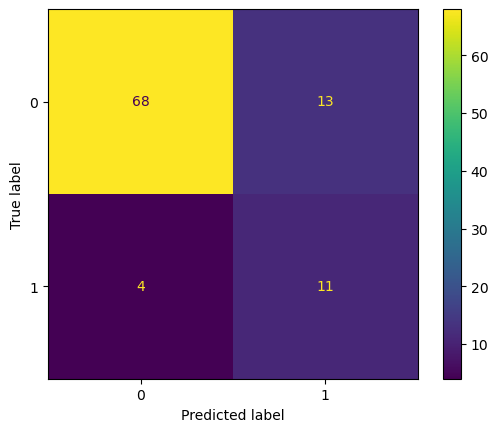

In [373]:
ConfusionMatrixDisplay(confusion_matrix(y_pred,y_test)).plot()

In [374]:
fi = rfc.feature_importances_

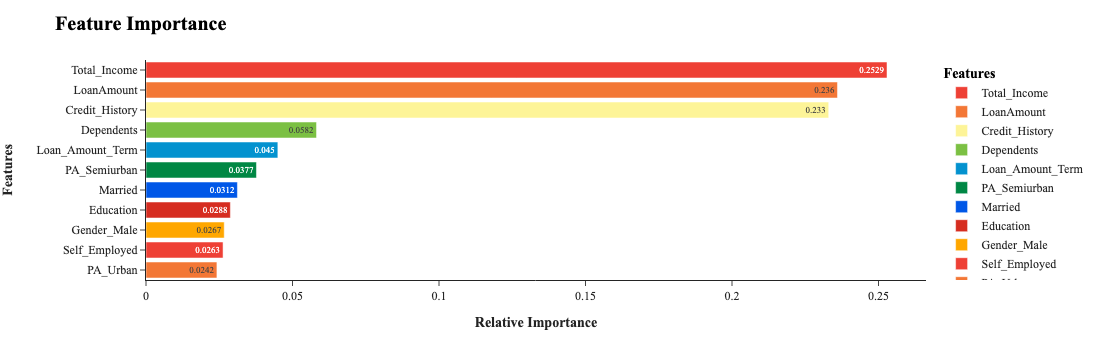

In [375]:
imp_df = pd.DataFrame(fi, columns = ['Imp'], index =X.columns ).reset_index()\
.sort_values('Imp', ascending=False)
imp_df['Imp'] = imp_df['Imp'].round(decimals = 4)
imp_df.columns = ['Features', 'Imp']

fig =px.bar(imp_df, y='Features',x='Imp', orientation='h', color='Features', 
            color_discrete_sequence=colorsy,
            template='simple_white', text_auto='True')
fig.update_layout(
    title='<b>Feature Importance</b>',
    font_family="Times New Roman",
    title_font_family="Times New Roman",title_font_color="#000000",
    title_font_size=20,
    xaxis_title="<b>Relative Importance</b>",
    yaxis_title="<b>Features</b>",
    legend_title='<b>Features</b>',
    legend_title_font_color="#000000",
                  plot_bgcolor ='#ffffff'
)

fig.show()